# Lab 6.03 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [95]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
df.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [96]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [97]:
for x in cols_with_dollars: 
    df[x] = df[x].str.replace('$', '').str.replace(' ', '').astype('float')

In [83]:
df = df.dropna()

In [93]:
df['7-day Gross'] = df['7-day Gross'].fillna(0)
df['14-day Gross'] = df['14-day Gross'].fillna(0)
df

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22707121.0,32109139.0,39517763.0,11000000.0,15909367.0,16000000.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,141803.0,318598.0,1540141.0,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12839402.0,0.0,22466994.0,18200000.0,27040983.0,25000000.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28263594.0,42853277.0,61356221.0,15000000.0,33166898.0,14000000.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,0.0,0.0,39868642.0,44407533.0,38189217.0,16500000.0
...,...,...,...,...,...,...,...,...,...,...
207,208.0,300,Warner Bros.,Action,96288328.0,141843655.0,210614939.0,245453242.0,261158713.0,60000000.0
208,209.0,The Pursuit of Happyness,Sony Pictures,Drama,38286895.0,79049229.0,162586036.0,143500000.0,90820939.0,55000000.0
209,210.0,The Number 23,New Line,Thriller/Suspense,17633643.0,26321000.0,35193167.0,41400000.0,27501523.0,32000000.0
210,211.0,Arctic Tale,Paramount Vantage,Documentary,0.0,0.0,833532.0,194090.0,NaN,NaN


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

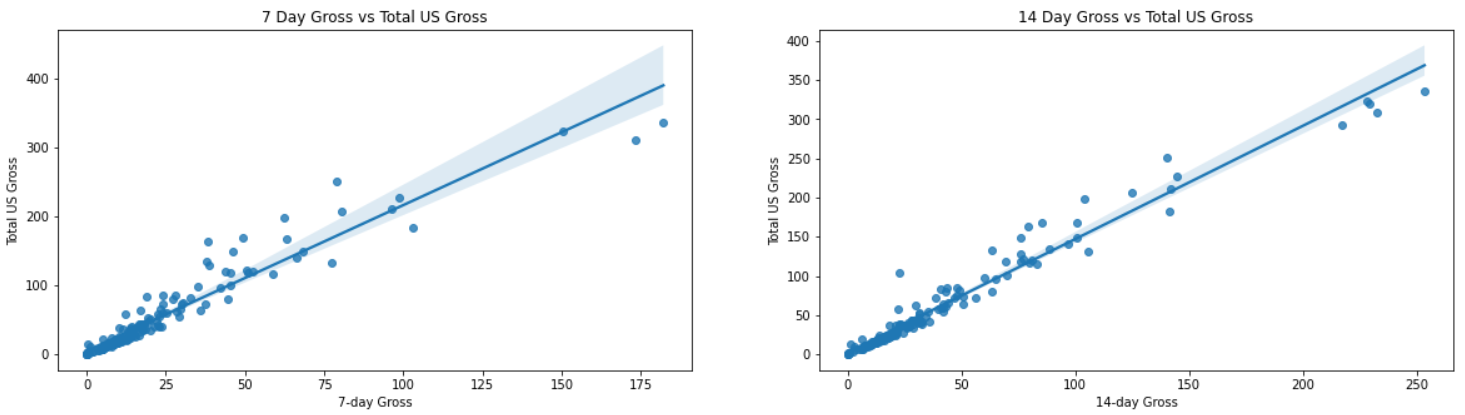

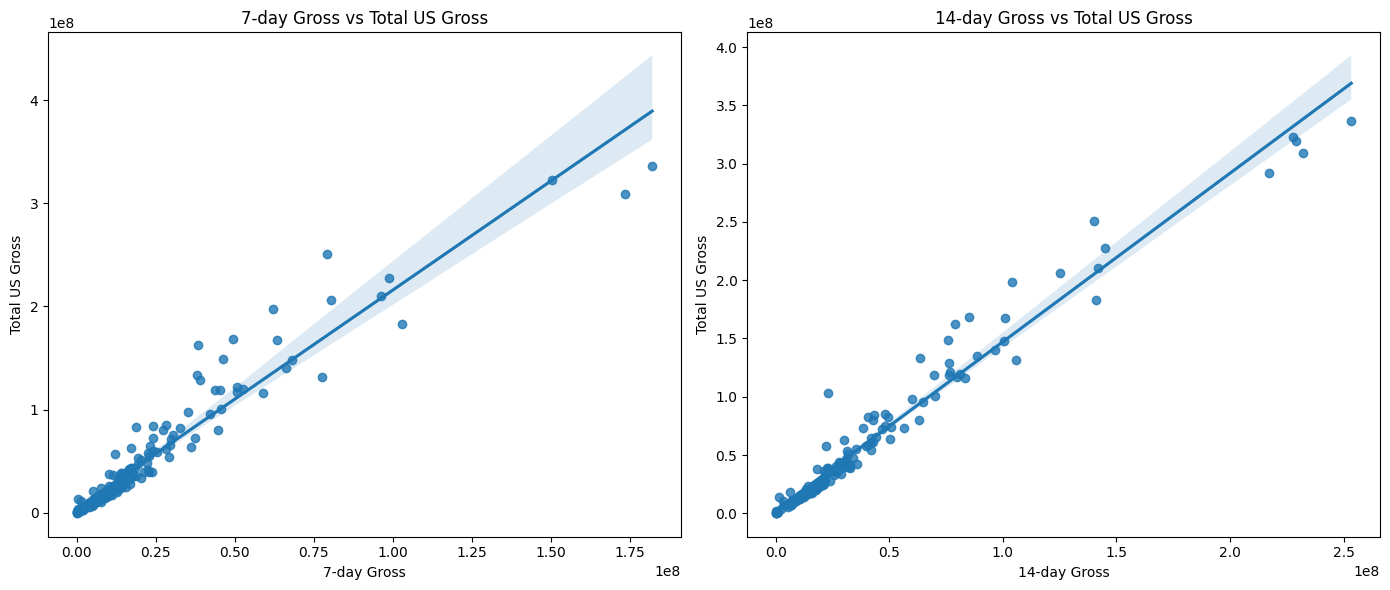

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot on the first subplot
sns.regplot(data=df, x='7-day Gross', y='Total US Gross', ax=axes[0])
axes[0].set_title('7-day Gross vs Total US Gross')

# Plot on the second subplot
sns.regplot(data=df, x='14-day Gross', y='Total US Gross', ax=axes[1])
axes[1].set_title('14-day Gross vs Total US Gross')

# Display the plots
plt.tight_layout()
plt.show()

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [92]:
# Calculate covar using the formula
covar = sum((df['7-day Gross'] - df['7-day Gross'].mean()) * 
            (df['Total US Gross'] - df['Total US Gross'].mean())) / (len(df) - 1)
        
print(f"Cov(x,y) = {covar}")

cor = np.corrcoef(df['7-day Gross'], df['Total US Gross'])[0][1]
print(f"R ≈ {cor:.5f}")
print(cor ** 2)

cor = np.corrcoef(df['14-day Gross'], df['Total US Gross'])[0][1]
print(f"R ≈ {cor:.5f}")
print(cor ** 2)

Cov(x,y) = nan
R ≈ nan
nan
R ≈ nan
nan


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [99]:
from sklearn.linear_model import LinearRegression

x = df['7-day Gross'].values.reshape(-1,1)
y = df['Total US Gross']

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

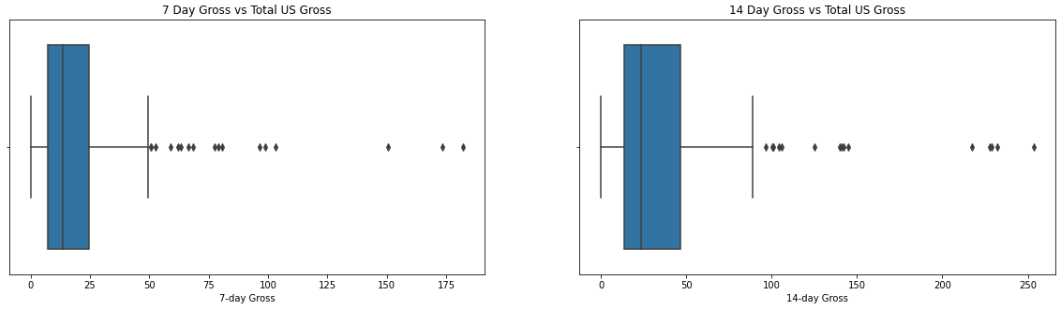

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

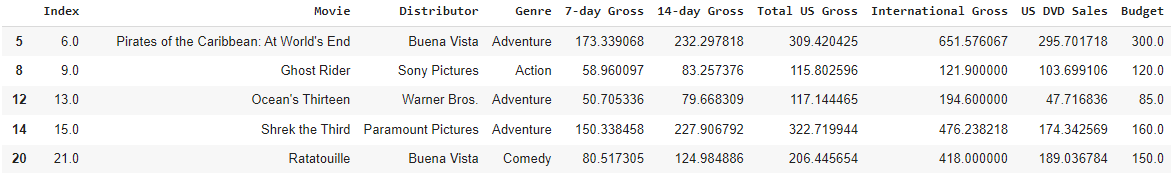

* 6.4 Remove the outliers out of the dataset.

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x